## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata,study_results, how="left", on="Mouse ID")
# Display the data table for preview
combine_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
count_mouse =combine_data_df["Mouse ID"].nunique()
count_mouse

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combine_data_df.loc[combine_data_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique
duplicate_mouse


<bound method Series.unique of 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object>

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = combine_data_df.loc[combine_data_df["Mouse ID"] == "g989"]
duplicate_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combine_data_df[combine_data_df["Mouse ID"].isin(duplicate_mouse_ID) == False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data_df["Mouse ID"].nunique()
num_mice

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group = combine_data_df.groupby("Drug Regimen")
print(drug_regimen_group["Mouse ID"].count())
drug_regimen_group["Drug Regimen"].describe() 


# This method is the most straighforward, creating multiple series and putting them all together at the end.



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,count,unique,top,freq
Drug Regimen,,,,
Capomulin,230,1,Capomulin,230
Ceftamin,178,1,Ceftamin,178
Infubinol,178,1,Infubinol,178
Ketapril,188,1,Ketapril,188
Naftisol,186,1,Naftisol,186
Placebo,181,1,Placebo,181
Propriva,161,1,Propriva,161
Ramicane,228,1,Ramicane,228
Stelasyn,181,1,Stelasyn,181


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0, 0.5, 'Number of mouse tested')

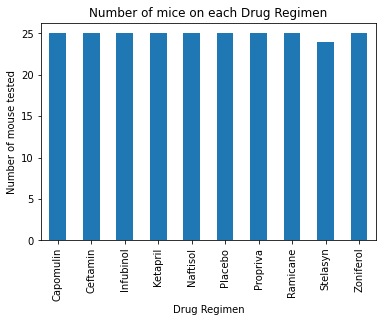

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_data = clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = mice_data.plot(kind="bar",title ="Number of mice on each Drug Regimen")
ax.set_ylabel("Number of mouse tested")


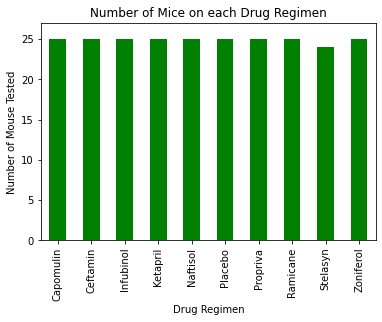

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

reg = clean_data_df.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Tested")

plt.xlim(-0.5, len(mice_data)-0.5)
plt.ylim(0,mice_data.max() +2)

plt.bar(reg.index, reg, facecolor="green",align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()


Male      125
Female    124
Name: Sex, dtype: int64

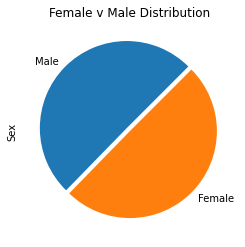

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_data_df[["Mouse ID", "Sex"]].drop_duplicates()

colors = ["blue","orange"]
explode=(0.05,0)

sex_distribution = mouse_gender["Sex"].value_counts()
s = sex_distribution.plot(kind="pie", title="Female v Male Distribution", startangle=45, explode=explode)
sex_distribution


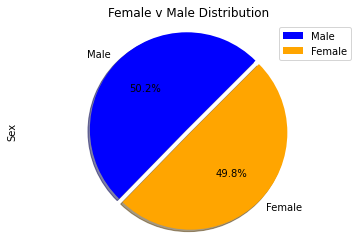

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=45, explode=explode)
plt.axis("equal")
plt.title("Female v Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint = clean_data_df.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol_df = pd.merge(clean_data_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])
tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_type = clean_data_df["Drug Regimen"].unique()
drug_type
list_of_drug = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


tumor_vol = []

for drug in list_of_drug:
    volume_df = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    

    

[[<matplotlib.axis.XTick at 0x2d283eda708>,
 [Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Capomulin'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Placebo'),
  Text(5, 0, 'Ceftamin'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Zoniferol'),
  Text(8, 0, 'Ketapril'),
  Text(9, 0, 'Propriva'),
  Text(10, 0, 'Naftisol')]]

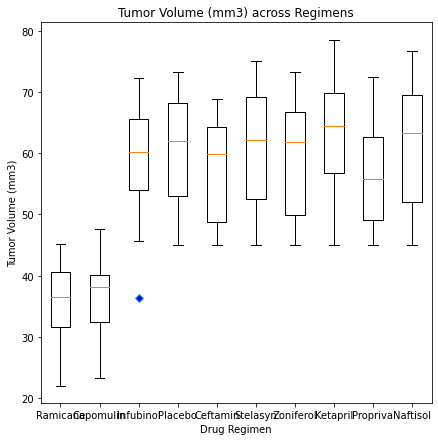

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drug) + 1),ticklabels=list_of_drug)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
